In [210]:
import autograd.numpy as np  
from autograd import grad, elementwise_grad
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [211]:
#Defining some activation functions and their derivative
def ReLU(z):
    return np.where(z > 0, z, 0)

def ReLU_der(z):
    return np.where(z > 0, 1, 0)
"""
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
"""
def sigmoid(z):
    return 1 / (1 + np.power(np.e, -1.0 * z))

def sigmoid_der(z):
    return sigmoid(z) * (1 - sigmoid(z))

def mse(predict, y_train):
    return np.mean((predict - y_train) ** 2)

def mse_der(predict, y_train):
    return 2 * (predict - y_train) / np.prod(predict.shape)



In [212]:

# He initialization
def create_layers_batch(network_input_size, layer_output_sizes):
    layers = []
    i_size = network_input_size
    for layer_output_size in layer_output_sizes:
        std = np.sqrt(2 / i_size) 
        W = np.random.randn(i_size, layer_output_size) * std  #Making sure the shapes macth
        b = np.zeros(layer_output_size)
        layers.append((W, b))
        i_size = layer_output_size
    return layers

# Update forward/backprop for new W shape (x @ W)
def feed_forward_saver_batch(x, layers, activation_funcs):
    layer_inputs = []
    zs = []
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        layer_inputs.append(a)
        z = a @ W + b
        a = activation_func(z)
        zs.append(z)
    return layer_inputs, zs, a

def feed_forward(x, layers, activation_funcs):
    a = x
    for (W, b), activation_func in zip(layers, activation_funcs):
        z = a @ W + b
        a = activation_func(z)
    return a

#Computing gradients
def backpropagation_batch(x, layers, activation_funcs, y, activation_ders, cost_der=mse_der):
    layer_inputs, zs, predict = feed_forward_saver_batch(x, layers, activation_funcs)
    layer_grads = [() for _ in layers]
    for i in reversed(range(len(layers))):
        layer_input, z, activation_der = layer_inputs[i], zs[i], activation_ders[i]
        if i == len(layers) - 1:
            dC_da = cost_der(predict, y)
        else:
            (W_next, _) = layers[i + 1]
            dC_da = dC_dz @ W_next.T
        dC_dz = dC_da * activation_der(z)
        dC_dW = layer_input.T @ dC_dz
        dC_db = np.sum(dC_dz, axis=0)
        layer_grads[i] = (dC_dW, dC_db)
    return layer_grads


(400, 1)
(400, 1)
(360, 1)
(360, 1)
Epoch 1, Train MSE: 0.0871, Test MSE: 0.0674
Epoch 2, Train MSE: 0.1012, Test MSE: 0.0717
Epoch 3, Train MSE: 0.0748, Test MSE: 0.0558
Epoch 4, Train MSE: 0.0387, Test MSE: 0.0299
Epoch 5, Train MSE: 0.0210, Test MSE: 0.0211
Epoch 6, Train MSE: 0.0148, Test MSE: 0.0169
Epoch 7, Train MSE: 0.0130, Test MSE: 0.0128
Epoch 8, Train MSE: 0.0398, Test MSE: 0.0481
Epoch 9, Train MSE: 0.0085, Test MSE: 0.0089
Epoch 10, Train MSE: 0.0068, Test MSE: 0.0084
Epoch 11, Train MSE: 0.0122, Test MSE: 0.0116
Epoch 12, Train MSE: 0.0093, Test MSE: 0.0101
Epoch 13, Train MSE: 0.0047, Test MSE: 0.0066
Epoch 14, Train MSE: 0.0102, Test MSE: 0.0124
Epoch 15, Train MSE: 0.0049, Test MSE: 0.0055
Epoch 16, Train MSE: 0.0055, Test MSE: 0.0079
Epoch 17, Train MSE: 0.0039, Test MSE: 0.0050
Epoch 18, Train MSE: 0.0033, Test MSE: 0.0048
Epoch 19, Train MSE: 0.0037, Test MSE: 0.0044
Epoch 20, Train MSE: 0.0045, Test MSE: 0.0050
Epoch 21, Train MSE: 0.0054, Test MSE: 0.0054
Epoch 2

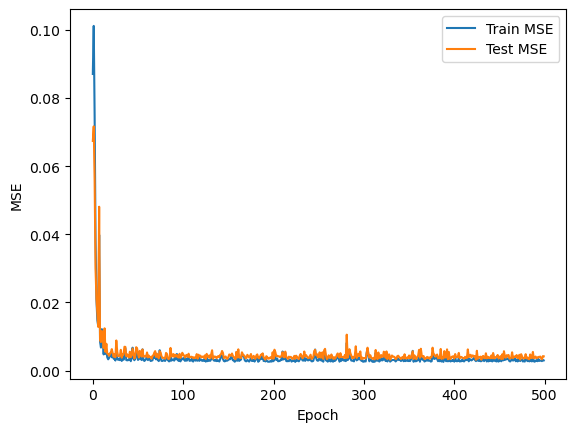

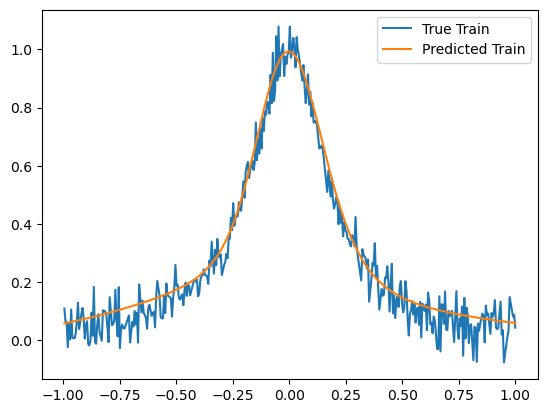

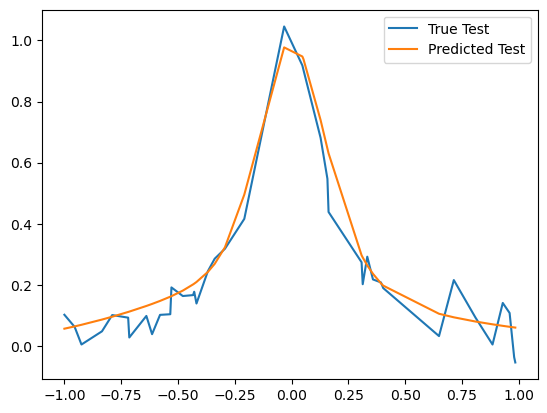

([(array([[ 1.17222556, -1.01762037,  1.94421746,  1.96639092, -0.05606814,
            3.09424323,  0.02312652, -0.88898662,  1.37382739,  1.51771229,
            1.09066671, -1.7491276 ,  3.09142034,  1.29861893,  2.95725989,
            2.26190813, -3.18986111, -0.74123213, -0.17934006,  2.41949262,
            1.45061603, -1.0195456 , -1.49202493,  0.17977045, -1.99618352,
           -1.42041944,  2.03918036,  0.41874328, -4.45961301, -2.58383367,
            1.27368201,  0.89592332,  0.74093586, -1.67942203, -2.08939684,
            1.03803316, -2.33044149,  2.03591072, -0.26304862,  0.43750007,
            0.69367009, -1.05332858,  0.76795488, -2.13288373, -0.54205275,
           -1.25702202,  0.58995698, -0.16096872, -0.11425922,  0.04195285]]),
   array([ 0.02871976, -0.09049799, -0.14287021, -0.19342821,  0.02289524,
          -0.16231187,  0.10279772, -0.05099499, -0.11518956, -0.11876644,
          -0.06664654, -0.11699948, -0.03636656, -0.10350185, -0.12353187,
          -0

In [213]:
from sklearn.model_selection import train_test_split
import numpy as np  
import matplotlib.pyplot as plt

#Defining the runge function and adding noise
def runge(x):
    return 1 / (1 + 25 * x**2)

batch_size = 400
x = np.linspace(-1, 1, batch_size).reshape(-1, 1)
y = runge(x) + 0.05 * np.random.normal(0, 1, batch_size).reshape(-1, 1)

network_input_size = 1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print(x.shape)
print(y.shape)
print(x_train.shape)
print(y_train.shape)


"""
activation_funcs = [ReLU, ReLU, lambda x: x]  # ReLU hidden, linear output
activation_ders = [ReLU_der, ReLU_der, lambda x: np.ones_like(x)]
"""
activation_funcs = [sigmoid, sigmoid, lambda x: x]  # ReLU hidden, linear output
activation_ders = [sigmoid_der, sigmoid_der, lambda x: np.ones_like(x)]

layer_output_sizes = [50, 50, 1]
learning_rate = 0.1
epochs = 500
train_batch_size = 1  # Add mini-batching

layers = create_layers_batch(network_input_size, layer_output_sizes)

def train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, batch_size=18):
    train_losses = []
    test_losses = []
    for epoch in range(epochs):
        # Shuffle
        perm = np.random.permutation(x_train.shape[0])
        x_shuffled = x_train[perm]
        y_shuffled = y_train[perm]
        
        # Mini-batch loop
        for start in range(0, x_train.shape[0], batch_size):
            end = min(start + batch_size, x_train.shape[0])
            input_batch = x_shuffled[start:end]
            target_batch = y_shuffled[start:end]
            
            layers_grad = backpropagation_batch(input_batch, layers, activation_funcs, target_batch, activation_ders, cost_der=mse_der)
            for (W, b), (W_g, b_g) in zip(layers, layers_grad):
                W -= learning_rate * W_g
                b -= learning_rate * b_g
        
        #Computing accuracies and predictions
        train_pred = feed_forward(x_train, layers, activation_funcs)
        test_pred = feed_forward(x_test, layers, activation_funcs)
        train_mse = mse(train_pred, y_train)
        test_mse = mse(test_pred, y_test)
        train_losses.append(train_mse) 
        test_losses.append(test_mse)
        print(f"Epoch {epoch+1}, Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")
    
    # Plot MSE
    plt.plot(train_losses, label='Train MSE')
    plt.plot(test_losses, label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    
    #Plot predictions (sorted for curve visualization)
    sort_idx_train = np.argsort(x_train[:, 0])
    plt.plot(x_train[sort_idx_train], y_train[sort_idx_train], label='True Train')
    plt.plot(x_train[sort_idx_train], train_pred[sort_idx_train], label='Predicted Train')
    plt.legend()
    plt.show()
    
    sort_idx_test = np.argsort(x_test[:, 0])
    plt.plot(x_test[sort_idx_test], y_test[sort_idx_test], label='True Test')
    plt.plot(x_test[sort_idx_test], test_pred[sort_idx_test], label='Predicted Test')
    plt.legend()
    plt.show()
    
    return layers, train_losses, test_losses

train_network(x_train, x_test, y_train, y_test, layers, activation_funcs, activation_ders, learning_rate, epochs, train_batch_size)

In [214]:
"""
#Gradient verification with autograd

verify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)
print("Backprop =",verify_grad[-1][0])


#Verify gradients
def cost(x_train, layers, activation_funcs, y_train):
    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]
    return mse(predict, y_train)

cost_grad = grad(cost, 1)
autoG = cost_grad(x_train, layers, activation_funcs, y_train)

print("Autograd =",autoG)
print("Backprop =",verify_grad)

diff = 0
for i in range(len(computed)):
    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])
if diff <= 10**-6:
    print("Same gradients")
"""



'\n#Gradient verification with autograd\n\nverify_grad = backpropagation_batch(x_train, layers, activation_funcs, y_train, activation_ders)\nprint("Backprop =",verify_grad[-1][0])\n\n\n#Verify gradients\ndef cost(x_train, layers, activation_funcs, y_train):\n    predict = feed_forward_saver_batch(x_train, layers, activation_funcs)[2]\n    return mse(predict, y_train)\n\ncost_grad = grad(cost, 1)\nautoG = cost_grad(x_train, layers, activation_funcs, y_train)\n\nprint("Autograd =",autoG)\nprint("Backprop =",verify_grad)\n\ndiff = 0\nfor i in range(len(computed)):\n    diff += abs(computed[-1][0][0][i])-abs(autoG[-1][0][0][i])\nif diff <= 10**-6:\n    print("Same gradients")\n'